In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

In [ ]:
#creating the dataframe
tax_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/train_set_label.csv" )
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/test_set_label.csv')

# BASIC EDA

In [ ]:
test_data.head()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
0,17,253274,-633752,2,1,94,3,0,1,1
1,590,47107,322850,0,1,30,2,1,1,0
2,224,111874,300583,0,2,46,3,0,1,1
3,960,96670,107419,0,3,77,5,0,0,0
4,57,128669,341273,0,0,92,4,1,1,1


In [ ]:
tax_data.shape

(803, 11)

In [ ]:
tax_data.size

8833

In [ ]:
tax_data.head(5)

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,61,183414,-12402,1,2,28,1,0,0,1,Democrat
1,501,129786,700251,2,5,63,3,0,0,0,Republican
2,658,268343,493411,2,4,44,1,1,0,1,Independent
3,703,290506,-433408,1,1,28,5,1,0,1,Republican
4,702,90108,907135,1,3,57,5,1,1,0,Democrat


In [ ]:
tax_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      803 non-null    int64 
 1   HHI             803 non-null    int64 
 2   HHDL            803 non-null    int64 
 3   Married         803 non-null    int64 
 4   CollegGrads     803 non-null    int64 
 5   AHHAge          803 non-null    int64 
 6   Cars            803 non-null    int64 
 7   Filed in 2017   803 non-null    int64 
 8   Filed in 2016   803 non-null    int64 
 9   Filed in 2015   803 non-null    int64 
 10  PoliticalParty  803 non-null    object
dtypes: int64(10), object(1)
memory usage: 69.1+ KB


In [ ]:
tax_data.describe()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
count,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000
mean,502.241594,155402.688667,-15351.252802,0.971357,2.607721,60.559153,2.435866,0.506849,0.509340,0.516812
std,288.460068,86788.153213,595184.302049,0.803935,1.675492,25.071219,1.703542,0.500265,0.500224,0.500029
min,1.000000,185.000000,-999994.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000
25%,254.500000,82373.000000,-516765.000000,0.000000,1.000000,38.000000,1.000000,0.000000,0.000000,0.000000
50%,501.000000,156542.000000,-24440.000000,1.000000,3.000000,60.000000,2.000000,1.000000,1.000000,1.000000
75%,754.500000,230772.000000,518135.500000,2.000000,4.000000,82.000000,4.000000,1.000000,1.000000,1.000000
max,1004.000000,299374.000000,999628.000000,2.000000,5.000000,105.000000,5.000000,1.000000,1.000000,1.000000


In [ ]:
# unique values in specific columns
tax_data.nunique()

Unnamed: 0        803
HHI               802
HHDL              803
Married             3
CollegGrads         6
AHHAge             88
Cars                6
Filed in 2017       2
Filed in 2016       2
Filed in 2015       2
PoliticalParty      3
dtype: int64

In [ ]:
# null values 
tax_data.isnull().sum()

Unnamed: 0        0
HHI               0
HHDL              0
Married           0
CollegGrads       0
AHHAge            0
Cars              0
Filed in 2017     0
Filed in 2016     0
Filed in 2015     0
PoliticalParty    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


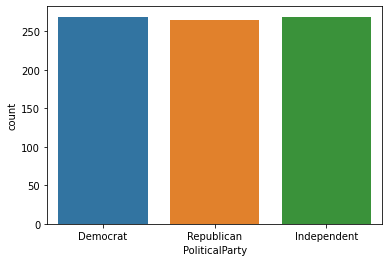

In [ ]:
sns.countplot(tax_data['PoliticalParty'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


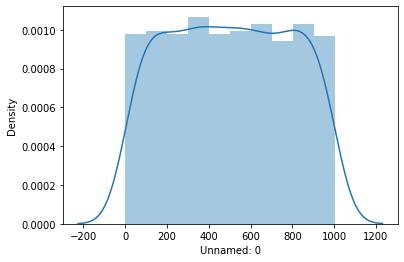

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


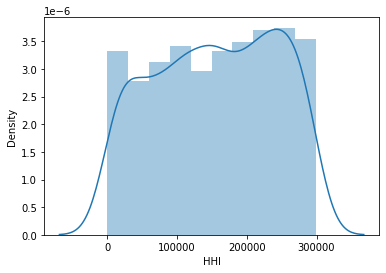

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


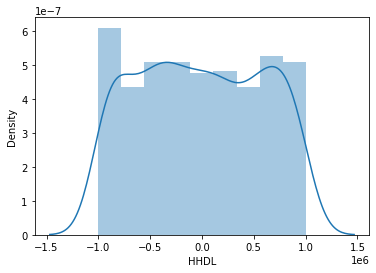

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


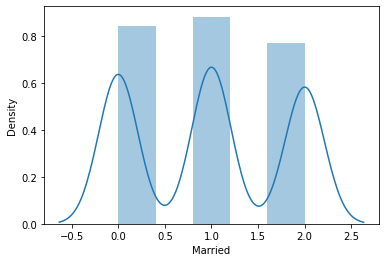

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


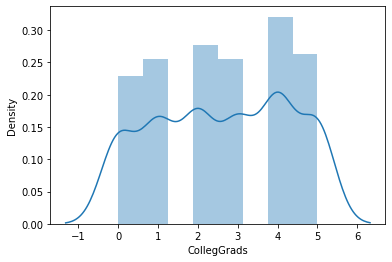

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


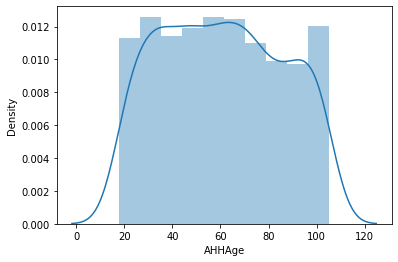

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


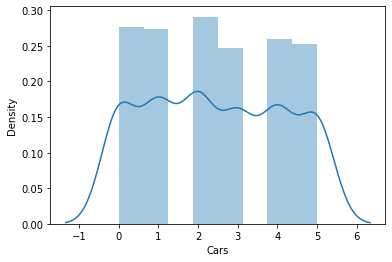

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


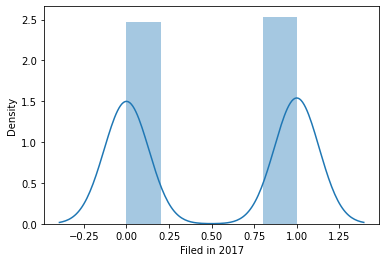

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


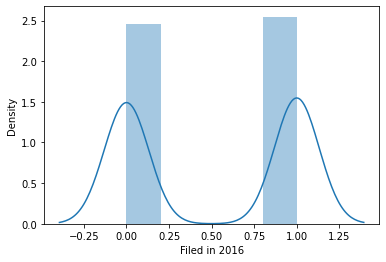

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


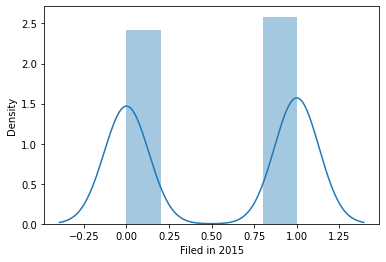

In [ ]:
# identifying the distribution in the columns
for i in tax_data.columns[:-1]:
    sns.distplot(tax_data[i]);
    plt.show()

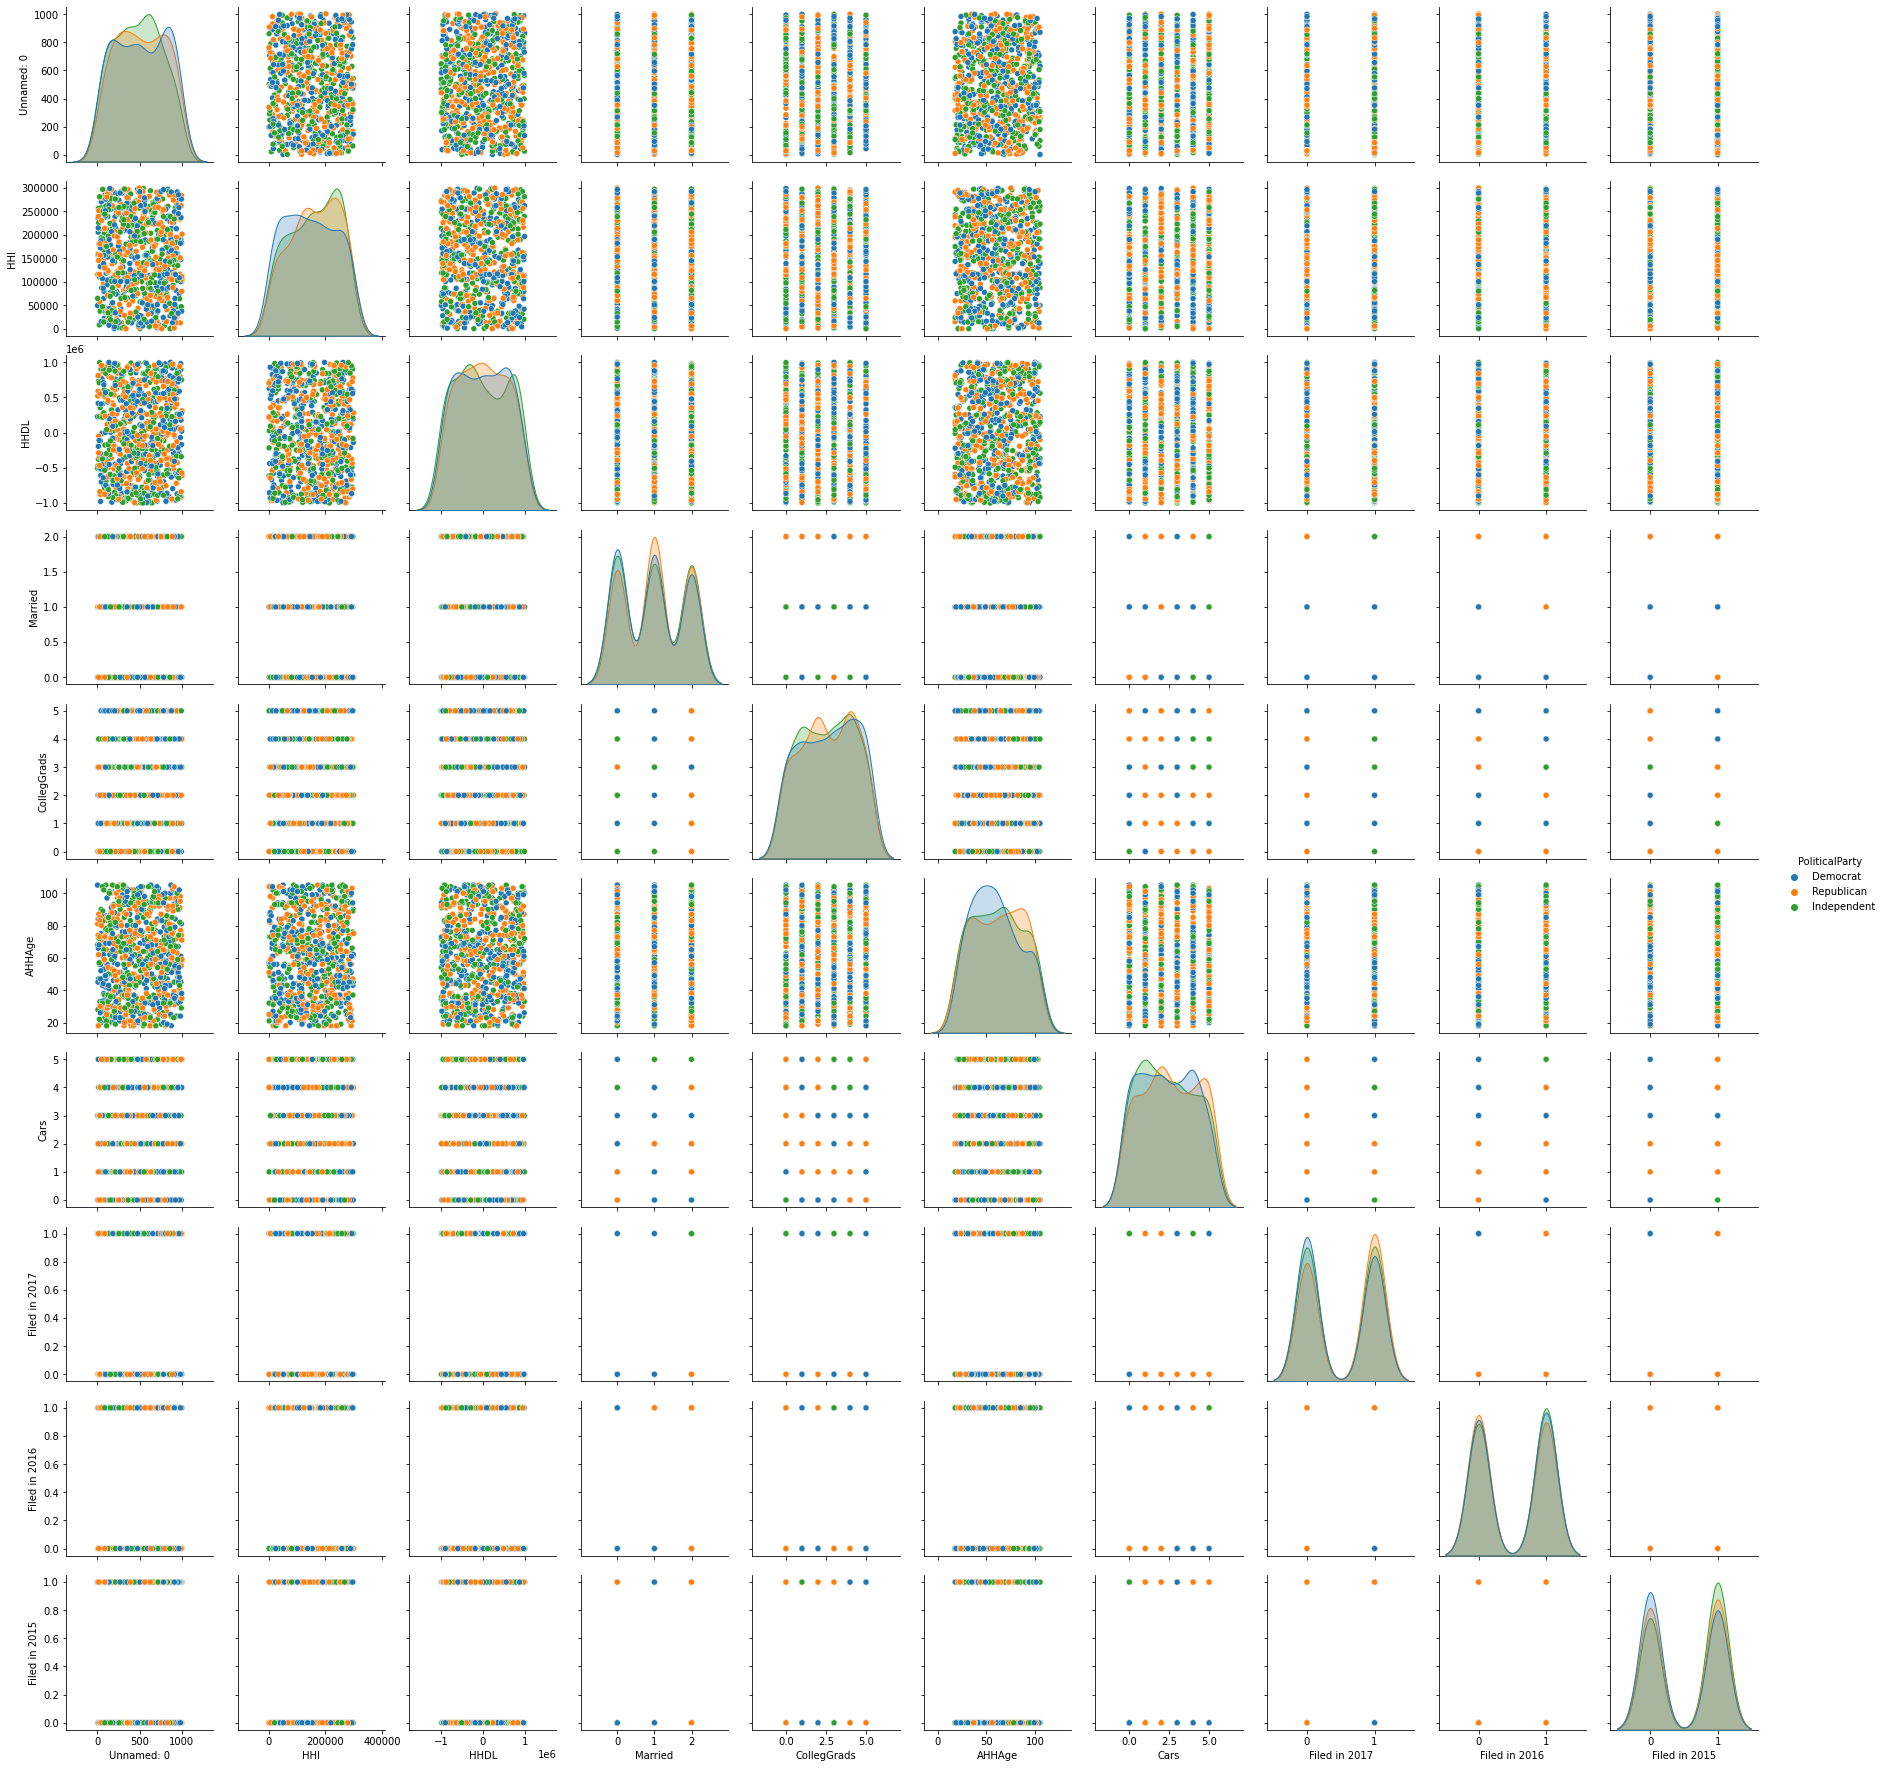

In [ ]:
# ploting pairplot between all the feature variables
sns.pairplot(tax_data,hue='PoliticalParty');

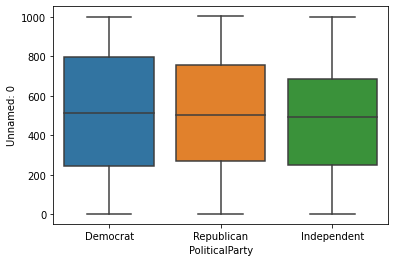

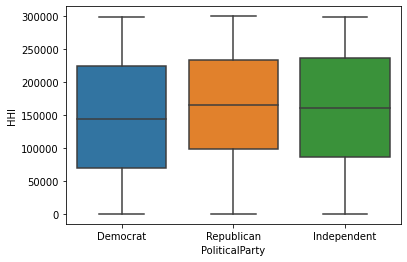

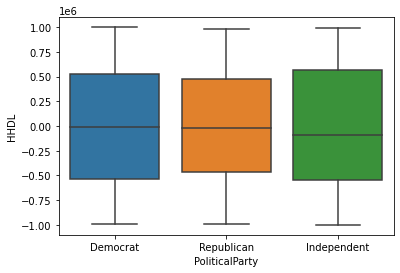

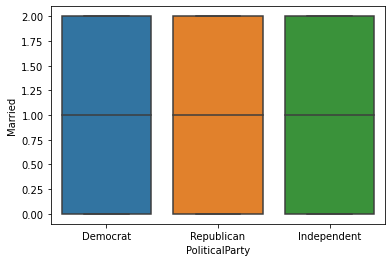

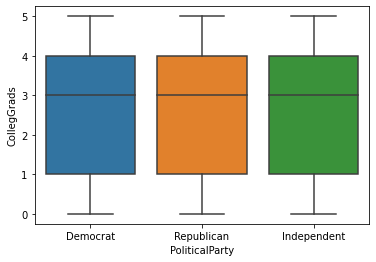

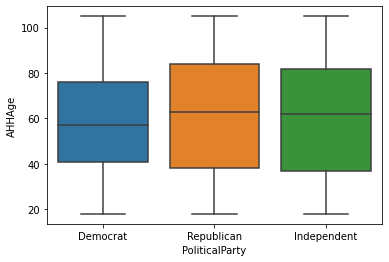

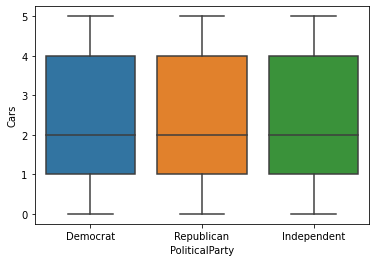

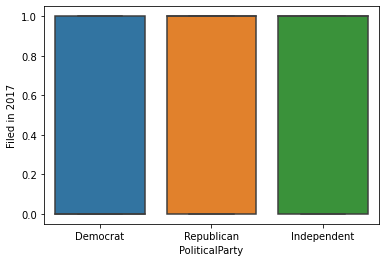

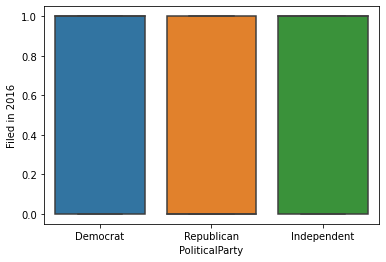

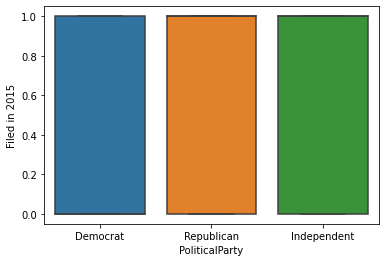

In [ ]:
# making boxplot using seaborn 
for i in tax_data.columns[:-1]:
    sns.boxplot(x='PoliticalParty',y=i,data=tax_data);
    plt.show()

# MODEL

In [ ]:
# label encode the political party column
label_encoder = LabelEncoder() 
tax_data['PoliticalParty']= label_encoder.fit_transform(tax_data['PoliticalParty']) 
tax_data['PoliticalParty'].unique() 

array([0, 2, 1])

In [ ]:
# dropping unnecessary columns
X=tax_data.drop(['PoliticalParty','Unnamed: 0'],axis=1)
test_df=tax_data.drop('Unnamed: 0',axis=1)
y=tax_data['PoliticalParty']

In [ ]:
X.head()

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
0,183414,-12402,1,2,28,1,0,0,1
1,129786,700251,2,5,63,3,0,0,0
2,268343,493411,2,4,44,1,1,0,1
3,290506,-433408,1,1,28,5,1,0,1
4,90108,907135,1,3,57,5,1,1,0


In [ ]:
# identifying low variance features
from sklearn.feature_selection import VarianceThreshold
df_var = VarianceThreshold()
df_var.fit_transform(X)
for feature in zip(X.columns, df_var.variances_):
    print(feature)

('HHI', 299189.0)
('HHDL', 1999622.0)
('Married', 0.6455058784849469)
('CollegGrads', 2.8037760018858298)
('AHHAge', 87.0)
('Cars', 2.89843969299436)
('Filed in 2017', 0.24995308688309245)
('Filed in 2016', 0.24991276486525474)
('Filed in 2015', 0.2497173581634251)


In [ ]:
df_var.variances_

array([2.99189000e+05, 1.99962200e+06, 6.45505878e-01, 2.80377600e+00,
       8.70000000e+01, 2.89843969e+00, 2.49953087e-01, 2.49912765e-01,
       2.49717358e-01])

In [ ]:
# appy standardzation to bring values in specific range
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
# test_data=pd.DataFrame(scaler.fit_transform(test_data),columns=test_data.columns)


# numerical features
num_cols = ['HHI','HHDL','AHHAge']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X[[i]])
    
    # transform the training data column
    X[i] = scale.transform(X[[i]])
    
    # transform the testing data column
    test_data[i] = scale.transform(test_data[[i]])

In [ ]:
test_data.head()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
0,17,1.128406,-1.039655,2,1,1.334665,3,0,1,1
1,590,-1.248594,0.568584,0,1,-1.219653,2,1,1,0
2,224,-0.501864,0.531148,0,2,-0.581074,3,0,1,1
3,960,-0.677158,0.206401,0,3,0.656174,5,0,0,0
4,57,-0.308226,0.599556,0,0,1.254843,4,1,1,1


In [ ]:
# dividing in train and test set 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
X_train,X_test,Y_train,Y_test=train_test_split(X[['HHDL','HHI','AHHAge','Filed in 2017','Filed in 2016','Married']],y,test_size = 0.3,random_state=21,stratify=y)


In [ ]:
# applyting random forest classifier
rf=RandomForestClassifier(random_state=21)
rf.fit(X_train,Y_train)


RandomForestClassifier(random_state=21)

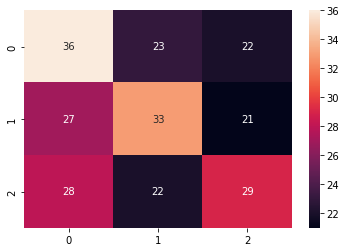

In [ ]:
# confusion matrix of all the predicted values
pred=rf.predict(X_test)
cm=confusion_matrix(Y_test,pred)
sns.heatmap(cm,annot=True);

In [ ]:
# accuracy of the model using sklearn library
accuracy_score(Y_test,pred)

0.4066390041493776

In [ ]:
# saving the prediction file for the test data
pred=rf.predict(test_data[['HHDL','HHI','AHHAge','Filed in 2017','Filed in 2016','Married']])
df=pd.DataFrame({"prediction":pred})
df['label']=df['prediction'].replace({0:"Democrat",2:"Republican",1:"Independent"})
df1=pd.DataFrame({"prediction":df['label']})
df1.to_csv("prediction.csv",index=False)